In [1]:
import omicverse as ov
import scanpy as sc


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.10, Tutorials: https://omicverse.readthedocs.io/


In [2]:
adata=sc.read_h5ad('./adata.h5ad')

In [2]:
adata = sc.read_h5ad(
    '/home/data/t070502/R/TED_rnaseq/rawcount/anndata.h5ad' # the directory with the `.mtx` fil
)                              # write a cache file for faster subsequent reading
adata

AnnData object with n_obs × n_vars = 101809 × 36340
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA'
    var: 'rownames(Seurat::GetAssay(obj, assay = assay))'

In [27]:
adata

AnnData object with n_obs × n_vars = 25310 × 36340
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features'
    uns: 'log1p', 'neighbors', 'over_clustering', 'scrublet'
    obsm: 'X_pca'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [3]:
adata.var.set_index('rownames(Seurat::GetAssay(obj, assay = assay))', inplace=True)


In [5]:
adata

AnnData object with n_obs × n_vars = 25310 × 36340
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features'
    uns: 'log1p', 'neighbors', 'over_clustering', 'scrublet'
    obsm: 'X_pca'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [20]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [5]:
import celltypist
from celltypist import models
model = models.Model.load(model = 'Immune_All_Low.pkl')

In [11]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata) 

In [6]:
predictions = celltypist.annotate(adata, model = 'Immune_All_Low.pkl', majority_voting = True)

🔬 Input data has 25310 cells and 36340 genes
🔗 Matching reference genes in the model
🧬 5566 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


In [7]:
adata = predictions.to_adata()

In [22]:
%%time
adata=ov.pp.qc(adata,
              tresh={'mito_perc': 0.2, 'nUMIs': 500, 'detected_genes': 250},
               #doublets_method='sccomposite',
              batch_key=None)
adata

CPU mode activated
Calculate QC metrics
End calculation of QC metrics.
Original cell number: 101809
!!!It should be noted that the `scrublet` detection is too old and             may not work properly.!!!
!!!if you want to use novel doublet detection,             please set `doublets_method=sccomposite`!!!
Begin of post doublets removal and QC plot using`scrublet`
Cells retained after scrublet: 99951, 1858 removed.
End of post doublets removal and QC plots.
Filters application (seurat or mads)
Lower treshold, nUMIs: 500; filtered-out-cells:         9
Lower treshold, n genes: 250; filtered-out-cells:         17
Lower treshold, mito %: 0.2; filtered-out-cells:         3
Filters applicated.
Total cell filtered out with this last --mode seurat QC (and its     chosen options): 17
Cells retained after scrublet and seurat filtering: 99934, 1875 removed.
CPU times: user 1h 2min 39s, sys: 28min 5s, total: 1h 30min 45s
Wall time: 56min 54s


AnnData object with n_obs × n_vars = 99934 × 34014
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'mt', 'n_cells'
    uns: 'orig.ident_colors', 'log1p', 'neighbors', 'over_clustering', 'majority_voting_colors', 'scrublet'
    obsm: 'X_pca'
    obsp: 'connectivities', 'distances'

In [3]:
%%time
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=2000,
                       target_sum=50*1e4)
adata

Begin robust gene identification
After filtration, 33895/36340 genes are kept.     Among 33895 genes, 24989 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
Time to analyze data in cpu: 9.51608157157898 seconds.
End of size normalization: shiftlog and HVGs selection pearson
CPU times: user 57 s, sys: 9.43 s, total: 1min 6s
Wall time: 22.6 s


AnnData object with n_obs × n_vars = 25310 × 24989
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'neighbors', 'over_clustering', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap', 'hvg'
    obsm: 'X_pca', 'X_umap', 'scaled|original|X_pca'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'connectivities', 'distances'

In [4]:
%%time
adata.raw = adata
adata = adata[:, adata.var.highly_variable_features]
adata

CPU times: user 37 ms, sys: 60.3 ms, total: 97.3 ms
Wall time: 96.1 ms


View of AnnData object with n_obs × n_vars = 25310 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'neighbors', 'over_clustering', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap', 'hvg'
    obsm: 'X_pca', 'X_umap', 'scaled|original|X_pca'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'connectivities', 'distances'

In [6]:
adata

View of AnnData object with n_obs × n_vars = 25310 × 24947
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'doublet_score', 'predicted_doublet', '_scvi_batch', '_scvi_labels'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features'
    uns: 'log1p', 'neighbors', 'over_clustering', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'X_pca', 'X_umap', 'scaled|original|X_pca'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'connectivities', 'distances'

In [3]:
%%time
ov.pp.scale(adata)
ov.pp.pca(adata,layer='scaled',n_pcs=50)
ov.pp.neighbors(adata, n_neighbors=15, n_pcs=50,
               use_rep='scaled|original|X_pca')
ov.pp.umap(adata)

adata

CPU times: user 42min 18s, sys: 45min 57s, total: 1h 28min 15s
Wall time: 1min 55s


AnnData object with n_obs × n_vars = 25310 × 36340
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features'
    uns: 'log1p', 'neighbors', 'over_clustering', 'scrublet', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'umap'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'connectivities', 'distances'

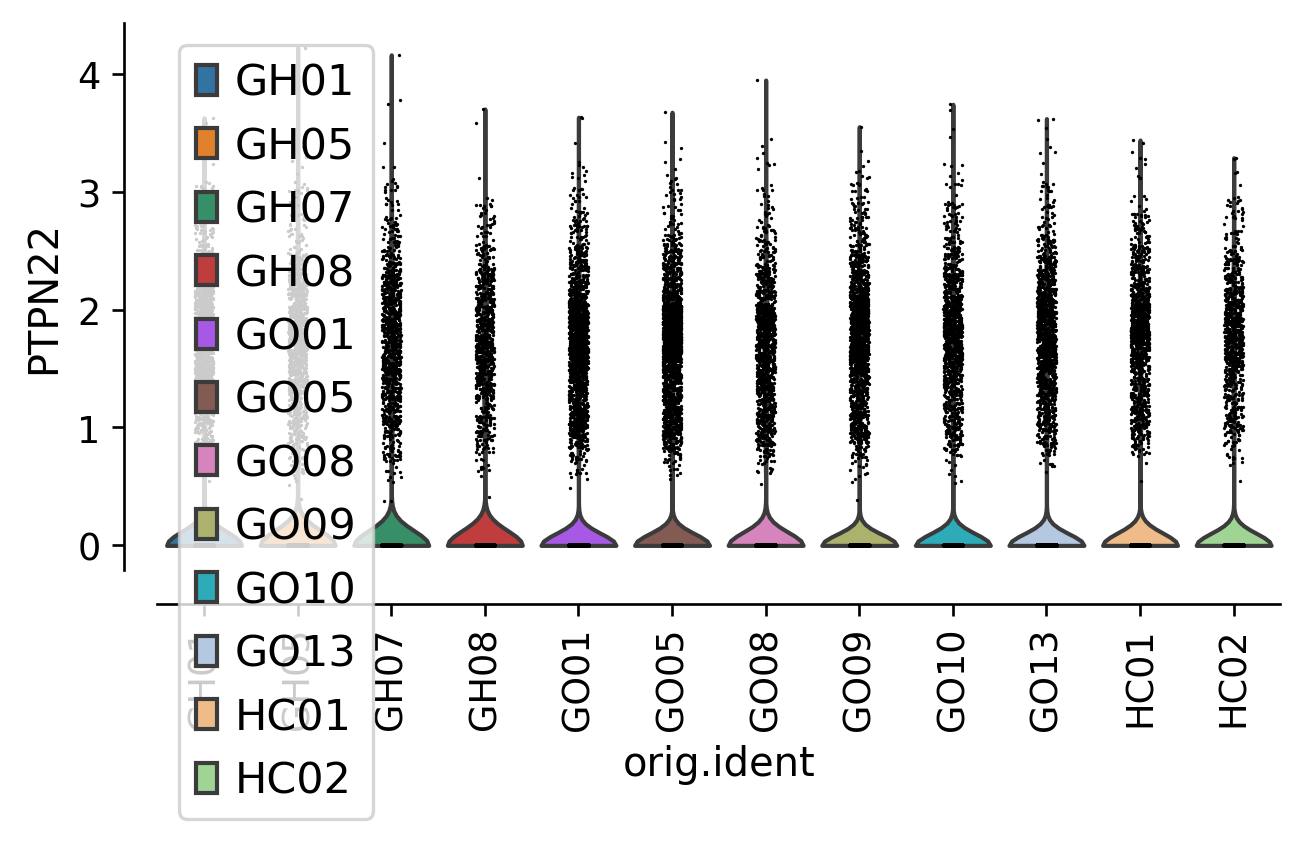

In [15]:
ov.pl.violin(adata,keys='PTPN22',groupby='orig.ident',figsize=(6,3))


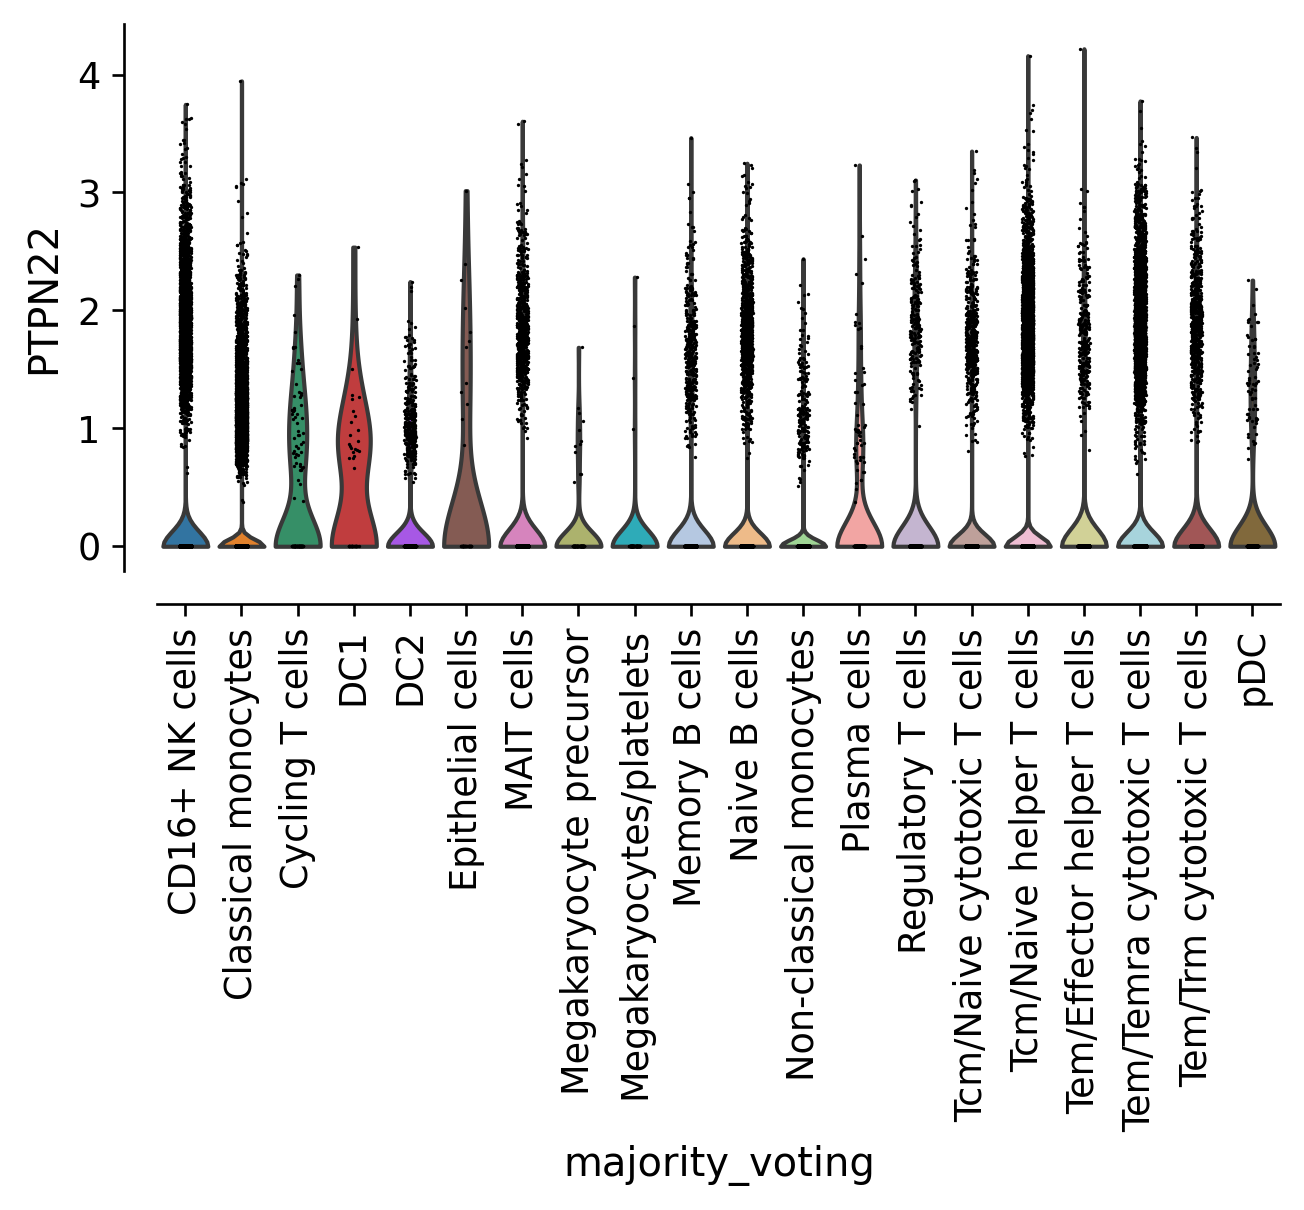

In [16]:
ov.pl.violin(adata,keys='PTPN22',groupby='majority_voting',figsize=(6,3))


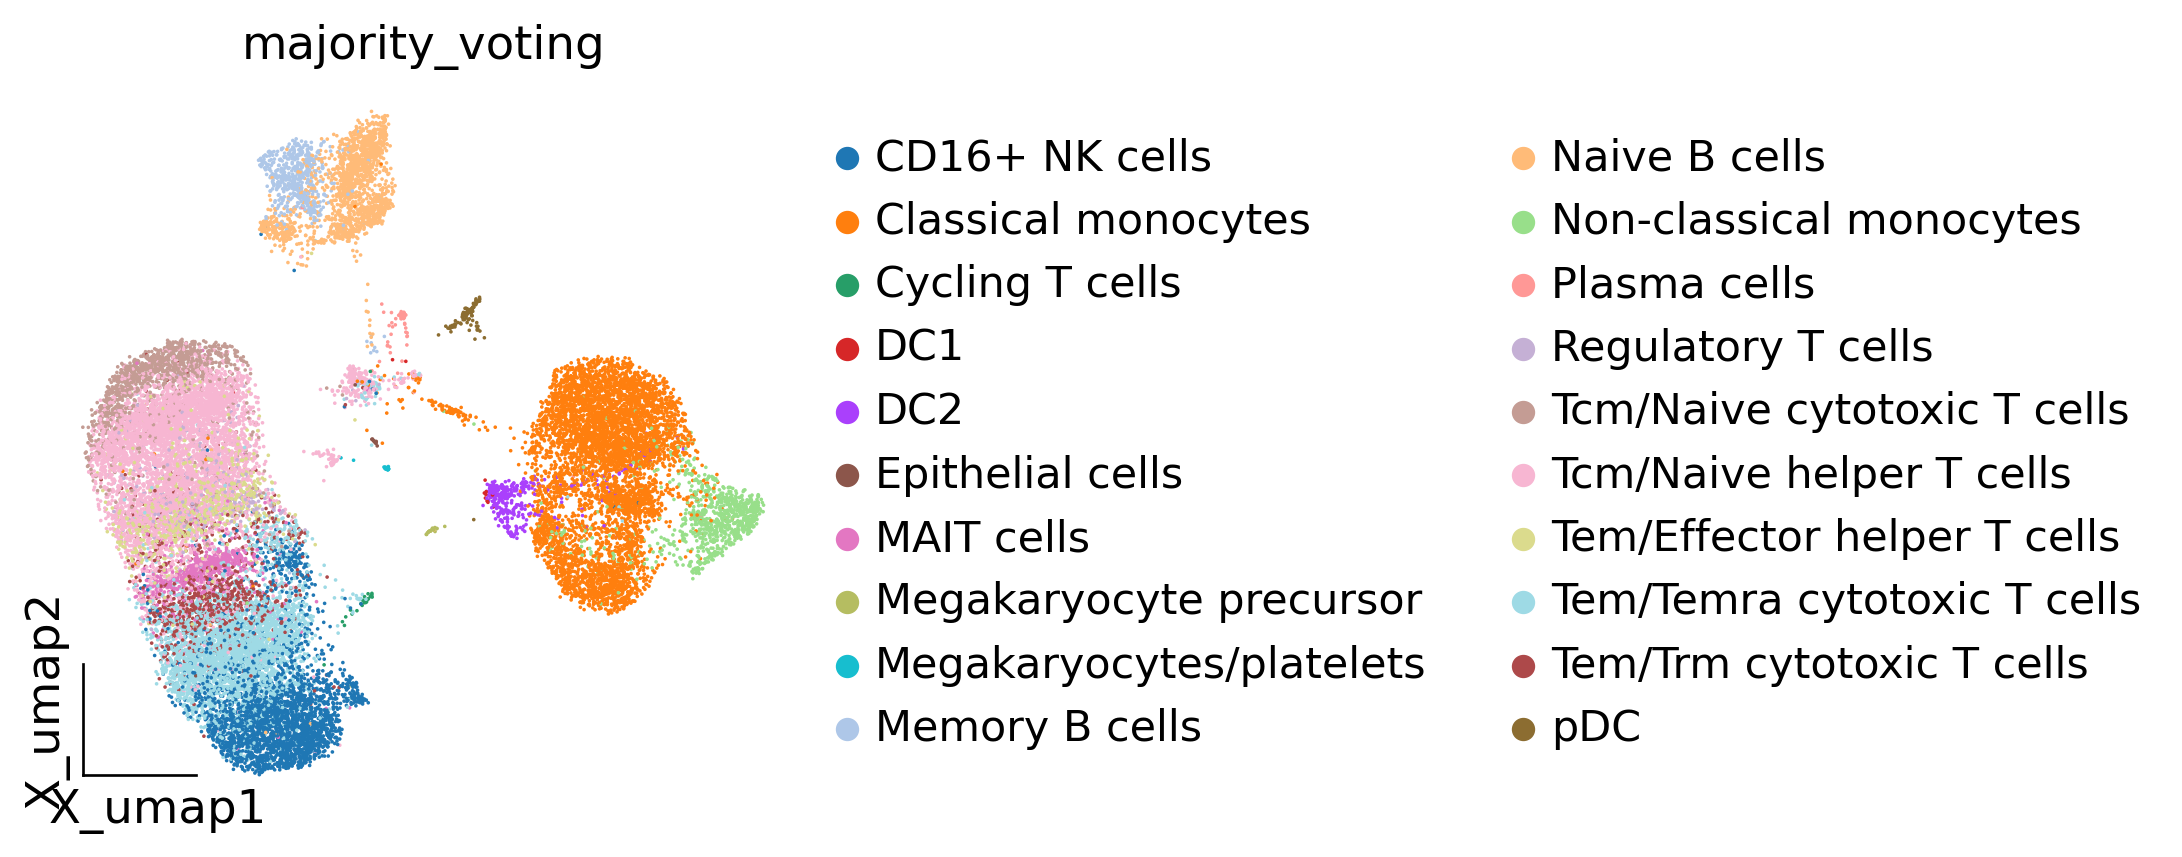

In [9]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['majority_voting'],
                frameon='small')

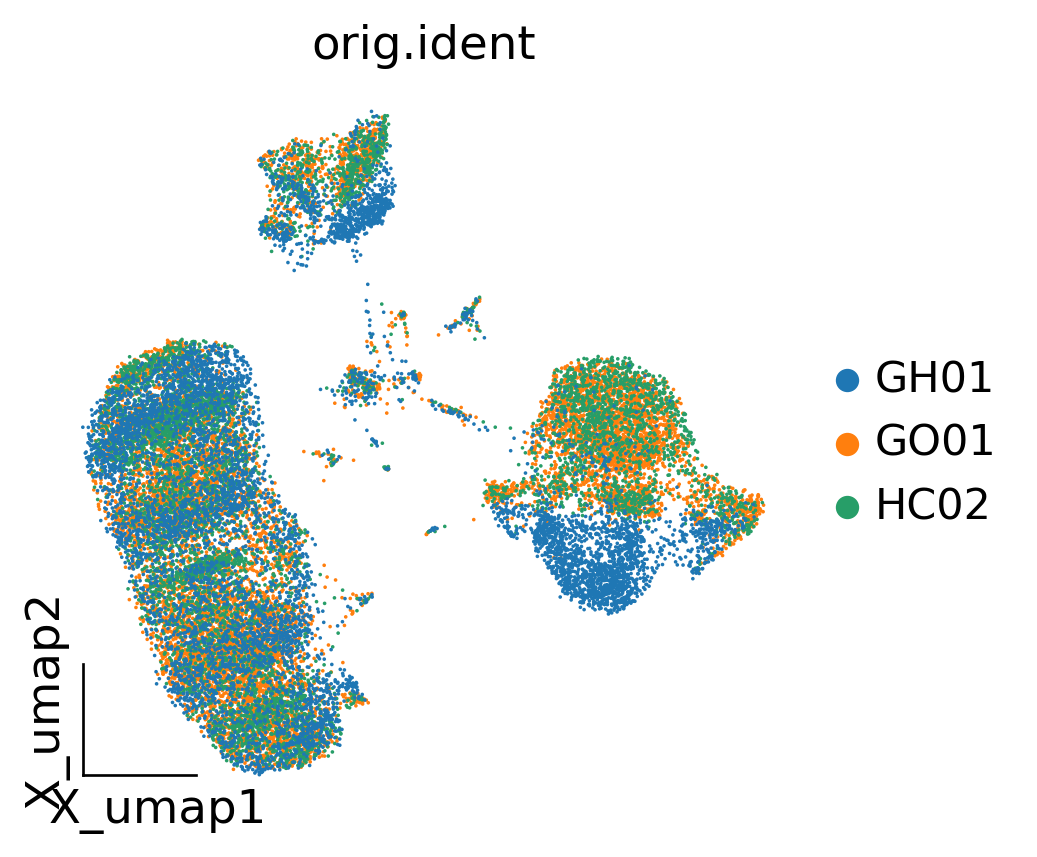

In [8]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['orig.ident'],
                frameon='small')

In [10]:
adata = adata.copy()

In [7]:
ov.pp.neighbors(adata, n_neighbors=15, n_pcs=50,
               use_rep='X_combat')
ov.pp.umap(adata)

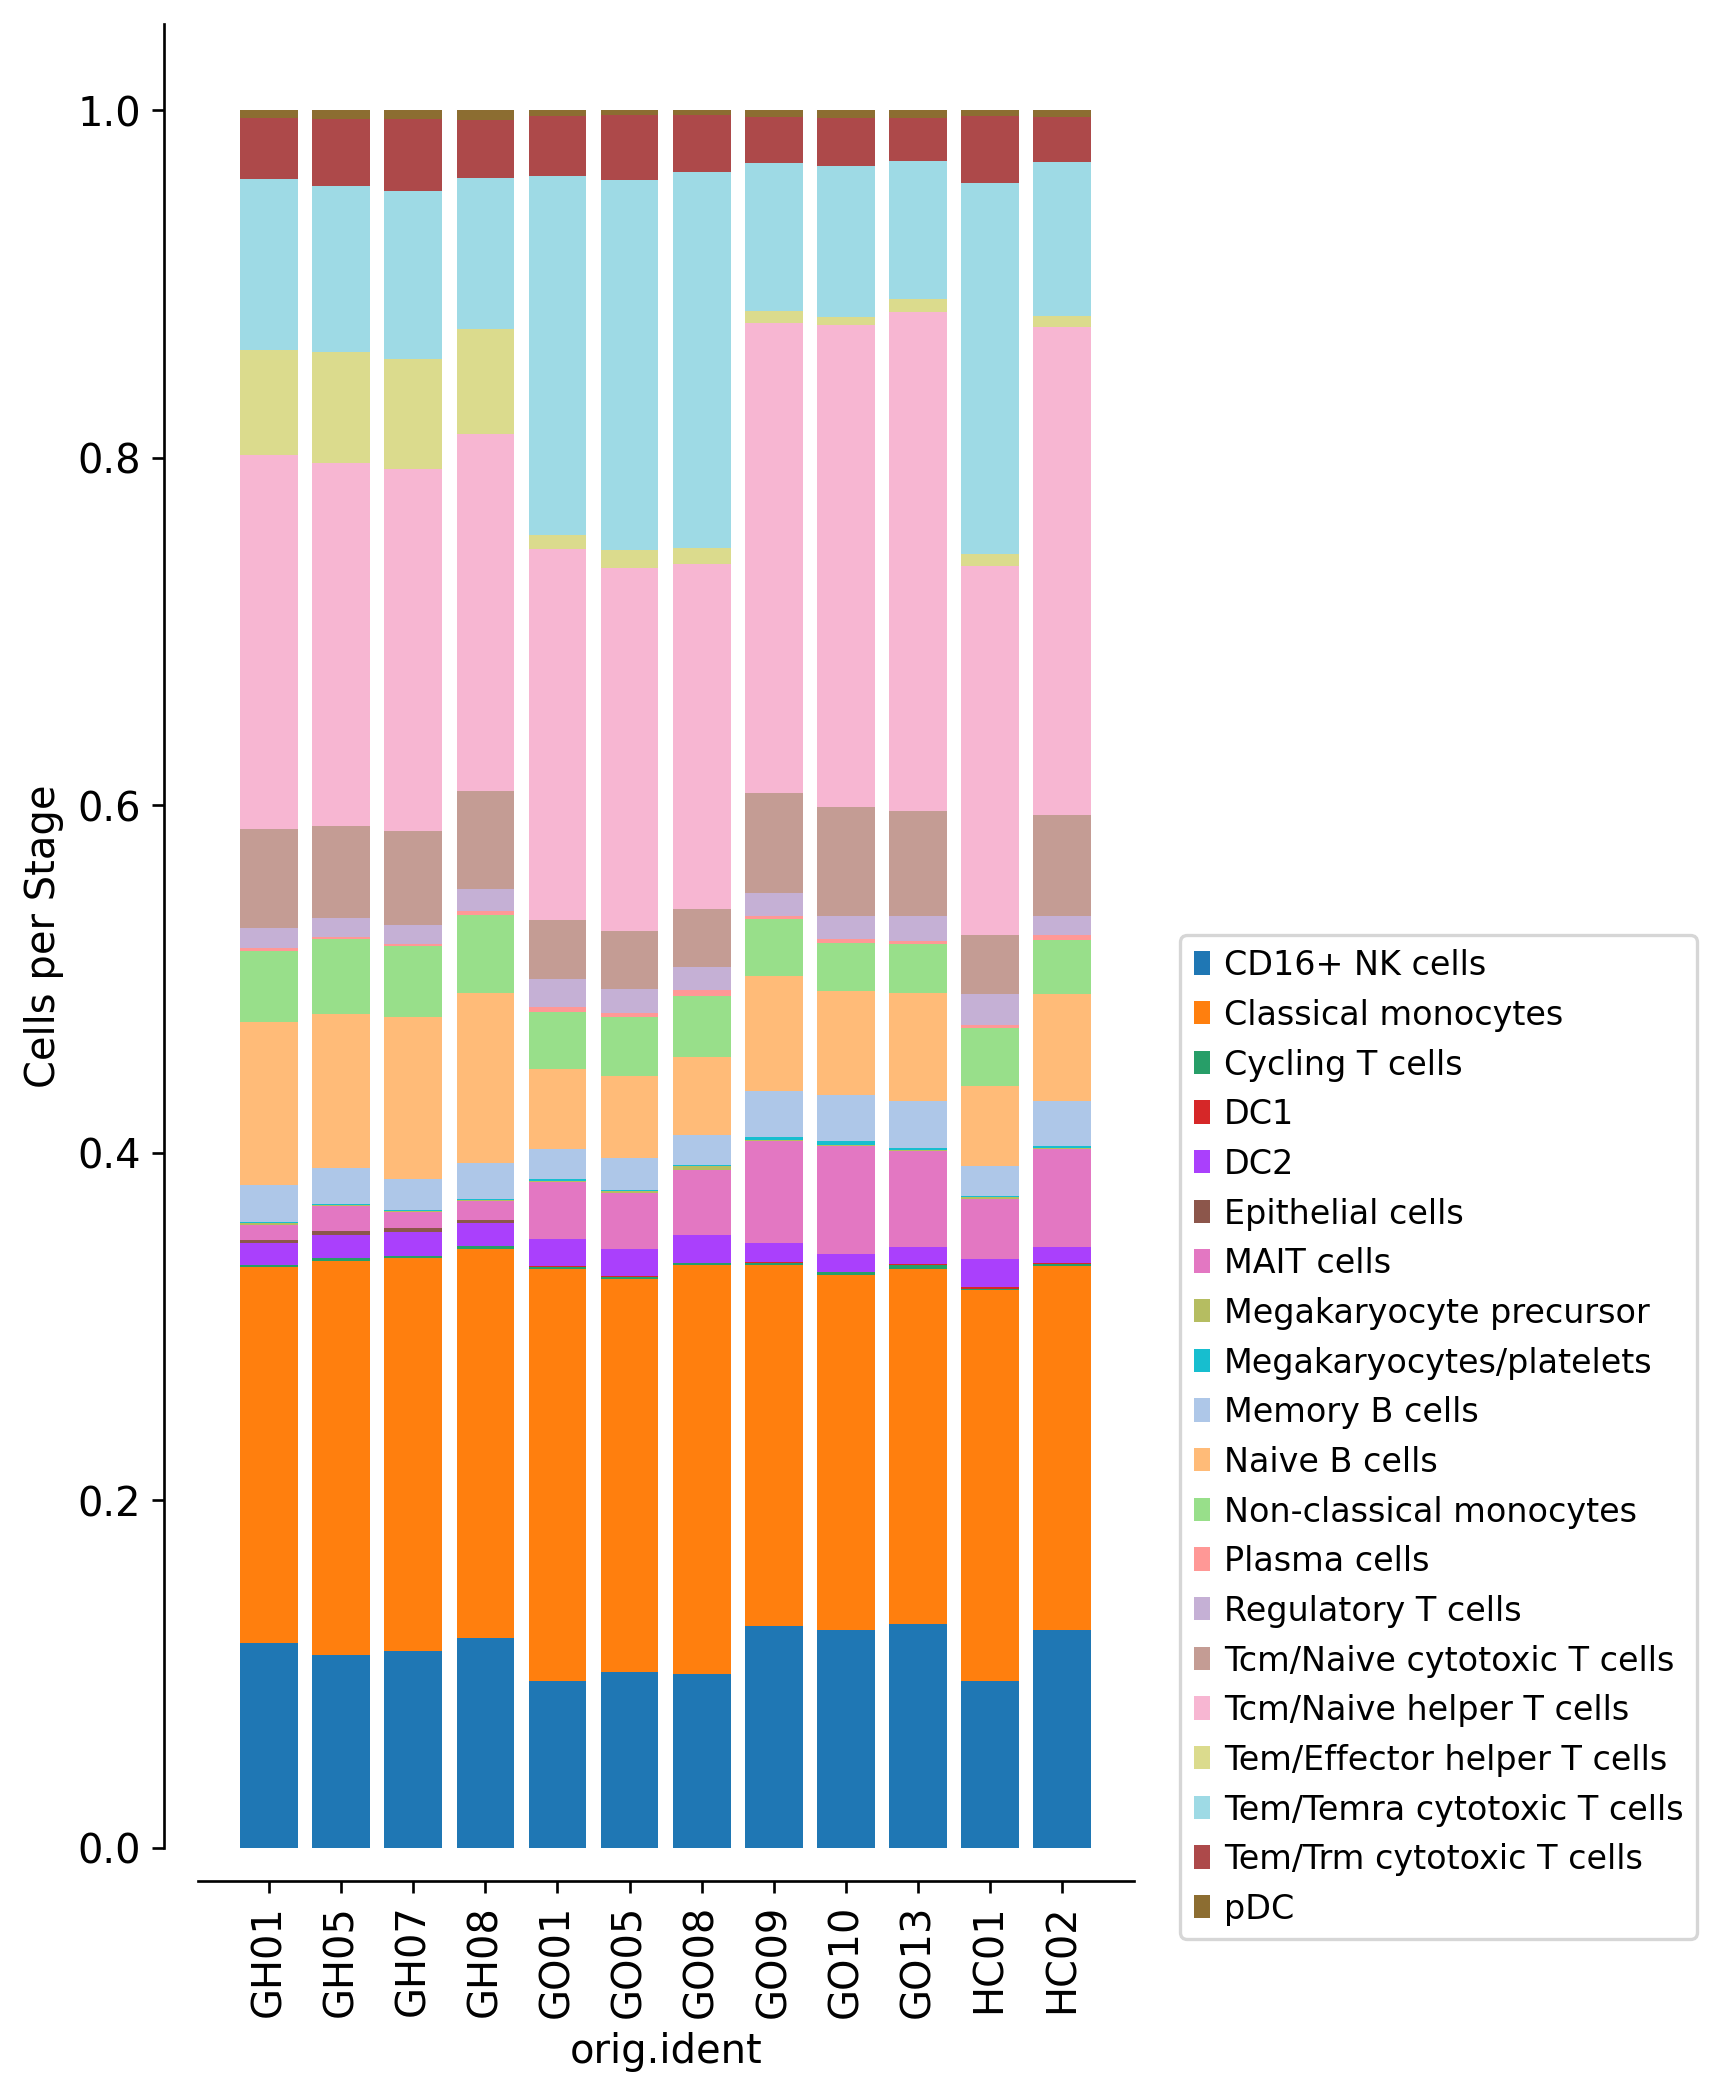

In [39]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize = (5,10))
ov.pl.cellproportion(adata=adata,celltype_clusters='majority_voting',
                    groupby='orig.ident',legend=True,ax=ax)

In [101]:
adata

In [148]:
adata=adata[(adata.obs['orig.ident']=='HC02')|(adata.obs['orig.ident']=='GO01')|(adata.obs['orig.ident']=='GH01')]

In [10]:
adata.write('adata.h5ad')

In [19]:
adata=sc.read('adata_raw.h5ad')

In [12]:
import pandas as pd
df = pd.read_csv('../scDRS-master/grave_PBMC/TED.full_score.gz', compression='gzip',sep='\t')


In [113]:
adata=adata_select1

In [13]:
# 假设 df 的第一列是细胞 barcode，先将其设为索引
df = df.set_index(df.columns[0])  # 例如 df.columns[0] = 'cell_barcode'

# 确保 adata.obs 的索引和 df 的索引一致
adata.obs['graves_zscore'] = df['zscore']  # 注意这里用单括号（Series），不是双括号（DataFrame）

<Figure size 2400x720 with 0 Axes>

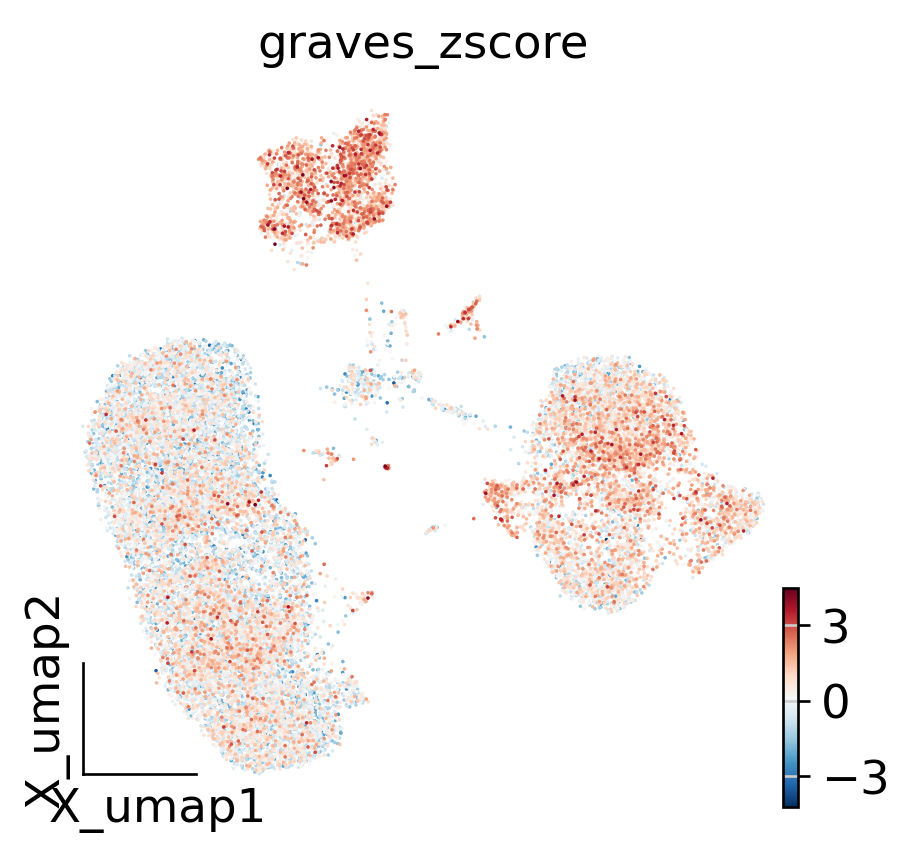

<Figure size 480x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

ov.pl.embedding(adata,
                basis='X_umap',
                color=['graves_zscore'],
                frameon='small')
plt.savefig("graves_zscore.pdf", format='pdf')


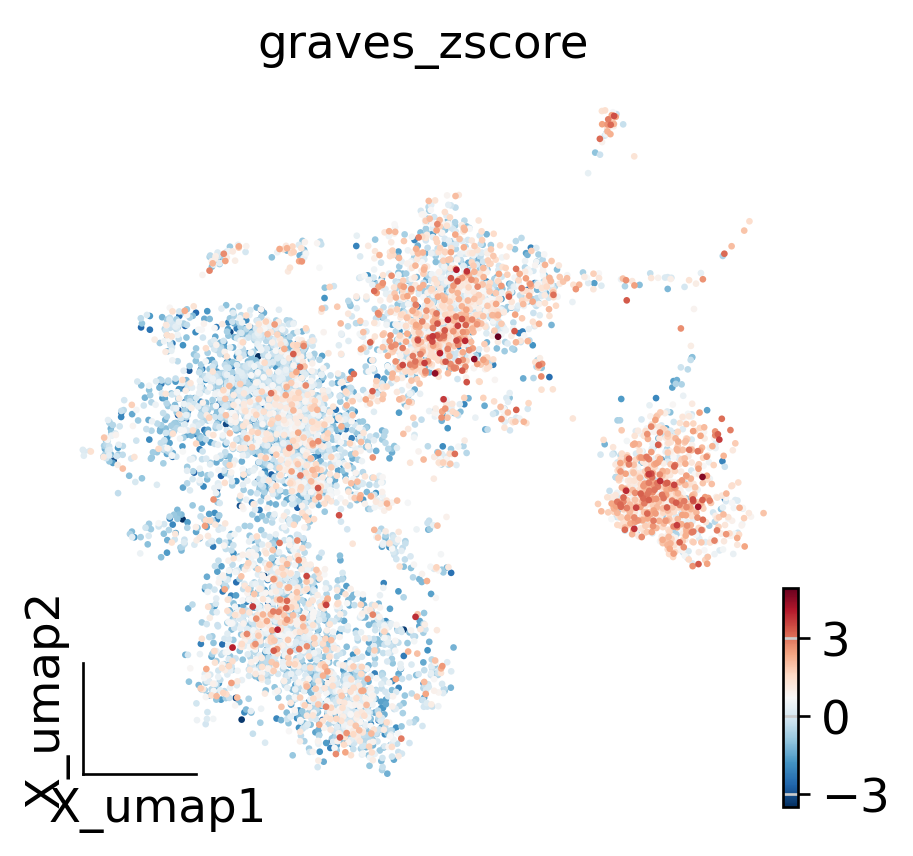

In [74]:
ov.pl.embedding(adata[adata.obs['orig.ident']=='GH01',],
                basis='X_umap',
                color=['graves_zscore'],
                frameon='small')

In [ ]:
ov.pl.embedding(adata[adata.obs['orig.ident']=='HC02',],
                basis='X_umap',
                color=['graves_zscore'],
                frameon='small')

Cannot find group ('Epithelial cells', 'GO01') for ['x', 'hue'] in data.
Cannot find group ('Epithelial cells', 'HC02') for ['x', 'hue'] in data.


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Tem/Trm cytotoxic T cells_GO01 vs. Tem/Trm cytotoxic T cells_HC02: t-test independent samples with Bonferroni correction, P_val:5.374e-01 t=2.605e+00
Tem/Trm cytotoxic T cells_GH01 vs. Tem/Trm cytotoxic T cells_GO01: t-test independent samples with Bonferroni correction, P_val:2.732e-01 t=-2.831e+00
Tem/Temra cytotoxic T cells_GO01 vs. Tem/Temra cytotoxic T cells_HC02: t-test independent samples with Bonferroni correction, P_val:1.610e-02 t=3.635e+00
Tem/Temra cytotoxic T cells_GH01 vs. Tem/Temra cytotoxic T cells_GO01: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=-2.257e+00
Tem/Effector helper T cells_GO01 vs. Tem/Effector helper T cells_HC02: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=1.516e+00
pDC_GO01 vs. pDC_HC02: t-test independent sa

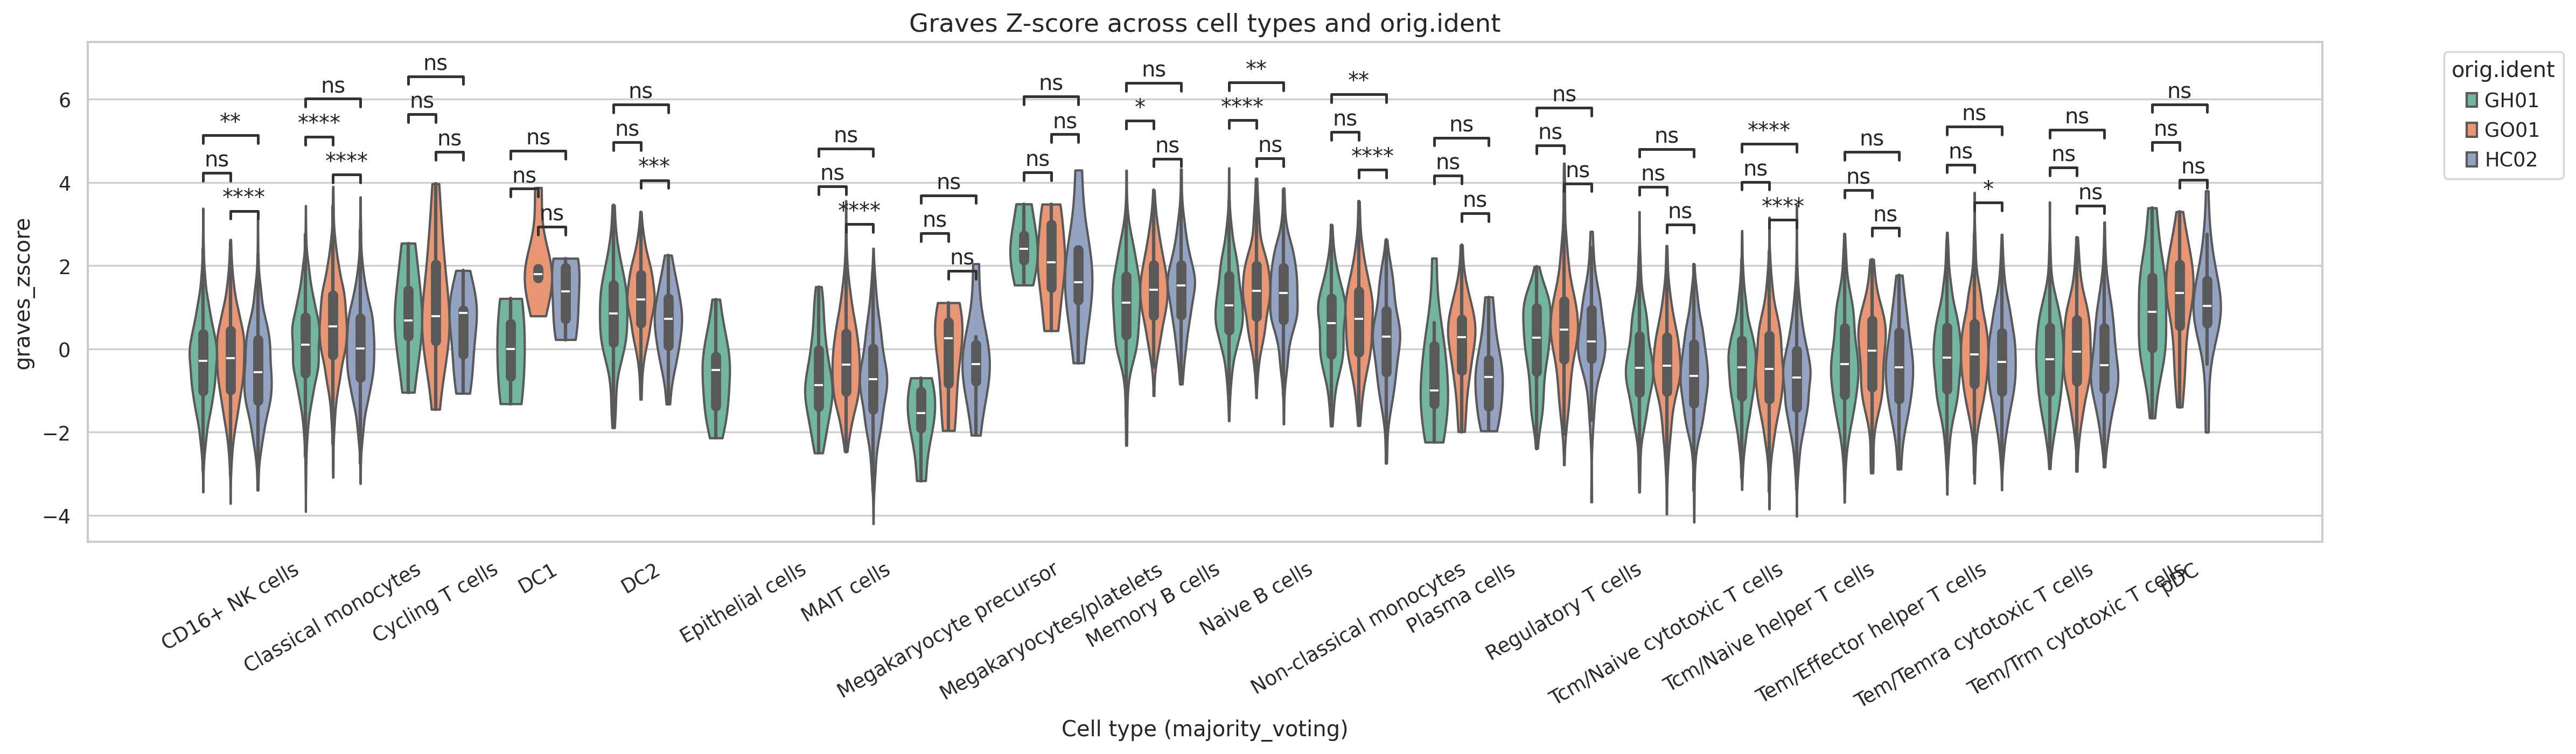

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
# 过滤出感兴趣的 orig.ident
adata_filtered = adata

# 创建一个新的 DataFrame，以便使用 seaborn
df = adata_filtered.to_df().copy()
df['orig.ident'] = adata_filtered.obs['orig.ident']
df['majority_voting'] = adata_filtered.obs['majority_voting']
df['graves_zscore']= adata_filtered.obs['graves_zscore']
# 设置绘图风格
# 设置 seaborn 风格
sns.set(style="whitegrid")

# 创建画布
plt.figure(figsize=(20, 6))
ax = sns.violinplot(data=df, x='majority_voting', y='graves_zscore',
                    hue='orig.ident', inner="box", palette="Set2",
                    cut=0, scale='width', dodge=True)

# 构建配对比较列表（每个细胞类型内部不同 orig.ident 两两比较）
pairs = []
for ct in df['majority_voting'].unique():
    groups = df[df['majority_voting'] == ct]['orig.ident'].unique()
    if len(groups) >= 2:
        for i in range(len(groups)):
            for j in range(i + 1, len(groups)):
                pairs.append(((ct, groups[i]), (ct, groups[j])))

# 添加显著性标注（仅显示显著的，使用 t-test）
annotator = Annotator(ax, pairs, data=df, x='majority_voting', y='graves_zscore', hue='orig.ident')
annotator.configure(test='t-test_ind', text_format='star', loc='inside', comparisons_correction="bonferroni")  # 🚨 不显示不显著的组
annotator.apply_and_annotate()

# 格式调整
plt.title("Graves Z-score across cell types and orig.ident", fontsize=14)
plt.ylabel("graves_zscore")
plt.xlabel("Cell type (majority_voting)")
plt.xticks(rotation=30)
plt.legend(title='orig.ident', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 🚀 保存为 PDF 文件
plt.savefig("graves_violinplot.pdf", format='pdf')
plt.show()

In [18]:
import pandas as pd
df = pd.read_csv('../scDRS-master/ted_PBMC/TED.full_score.gz', compression='gzip',sep='\t')


In [19]:
# 假设 df 的第一列是细胞 barcode，先将其设为索引
df = df.set_index(df.columns[0])  # 例如 df.columns[0] = 'cell_barcode'

# 确保 adata.obs 的索引和 df 的索引一致
adata.obs['ted_zscore'] = df['zscore']  # 注意这里用单括号（Series），不是双括号（DataFrame）

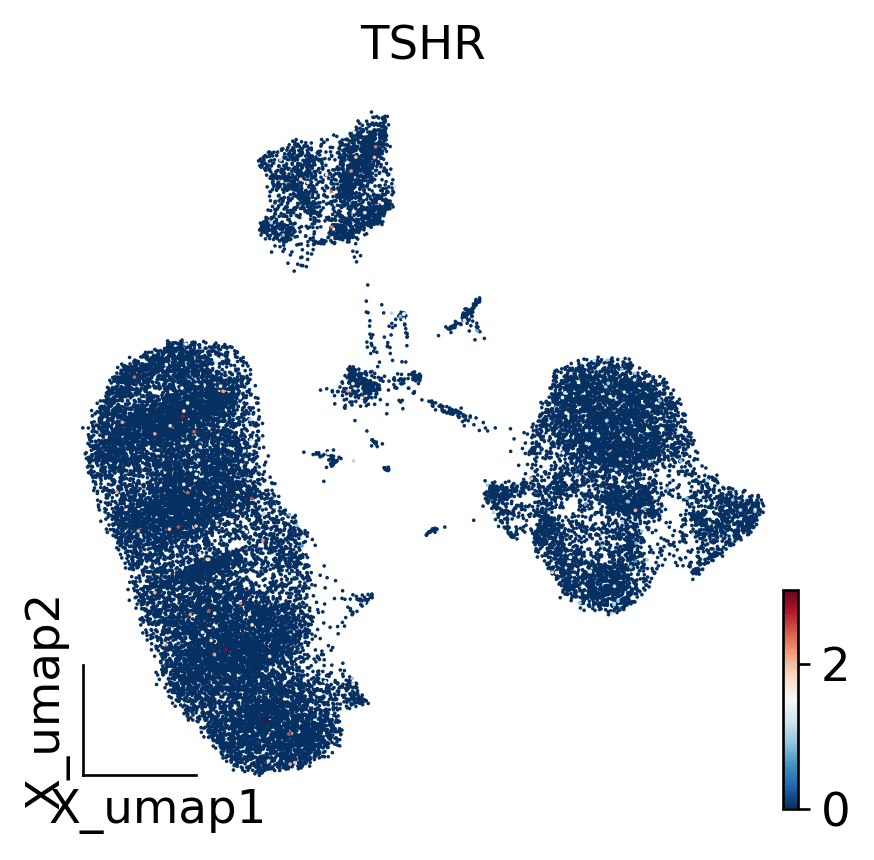

In [22]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['TSHR'],
                frameon='small')

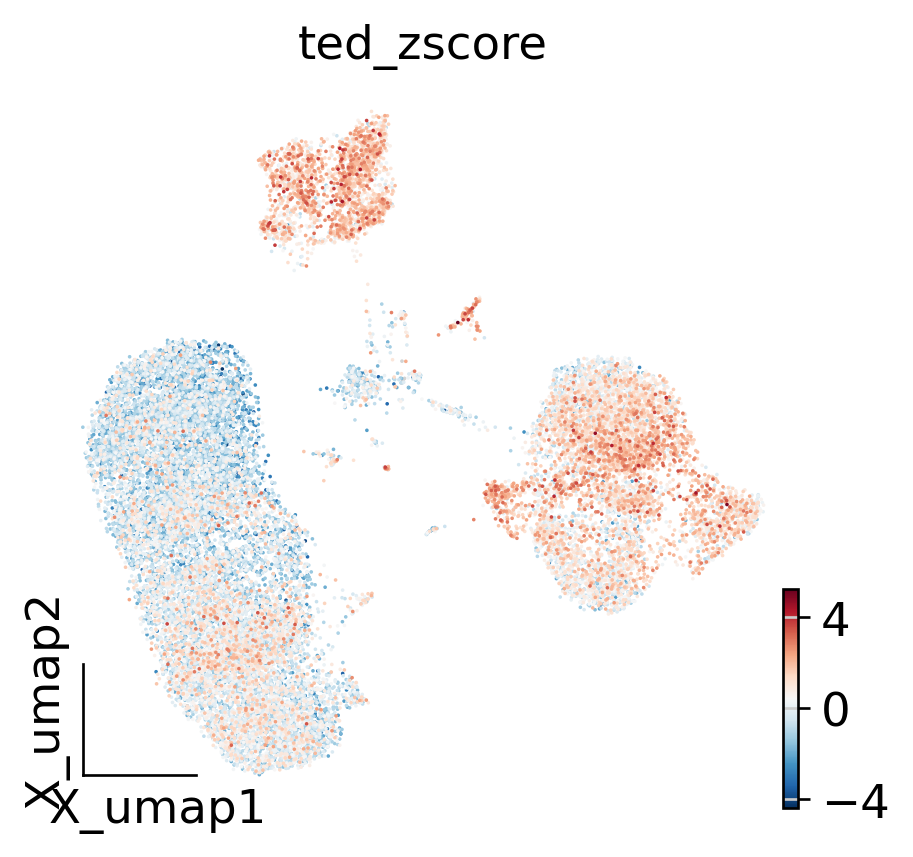

In [20]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['ted_zscore'],
                frameon='small')

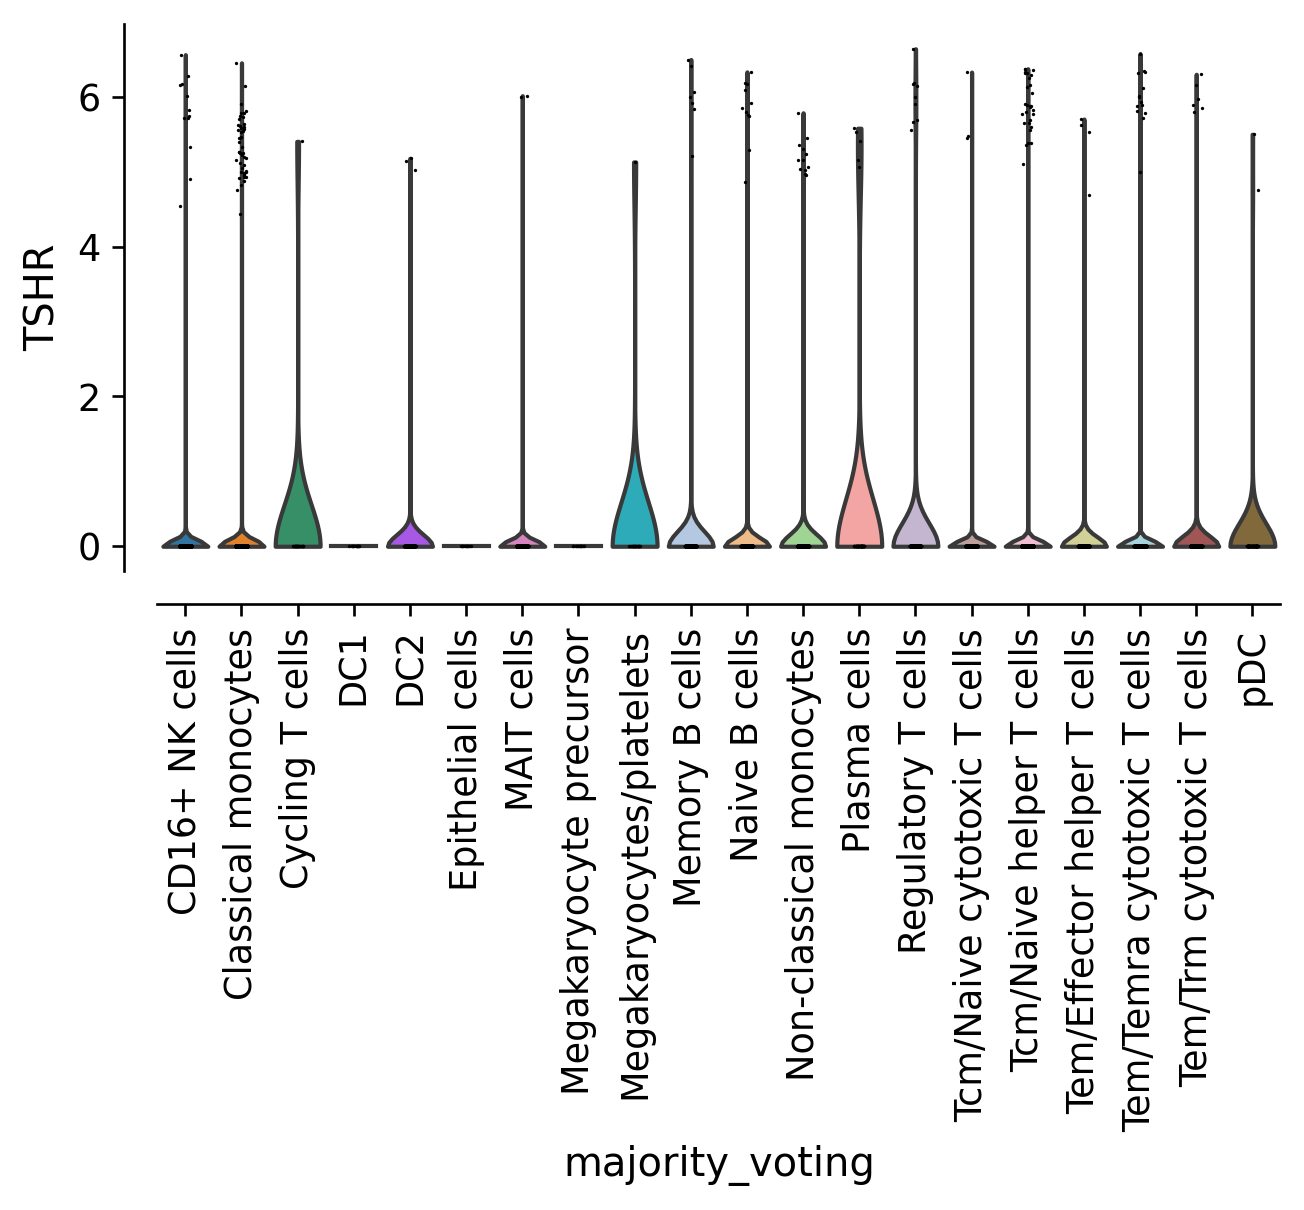

In [18]:
ov.pl.violin(adata,keys='TSHR',groupby='majority_voting',figsize=(6,3))


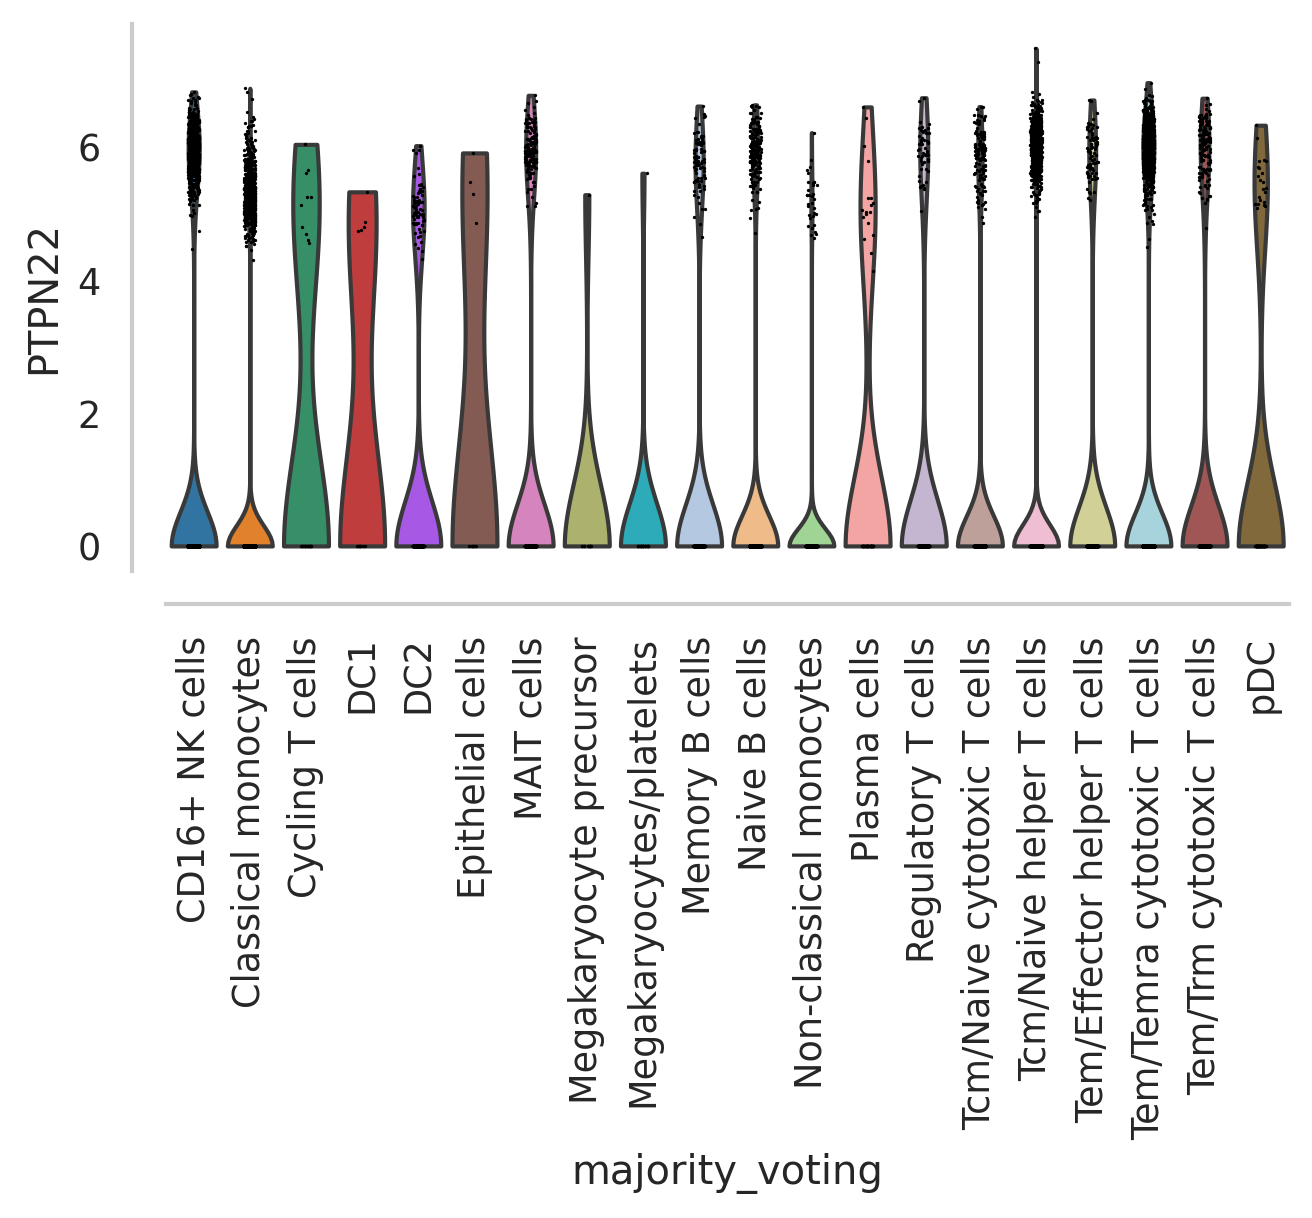

In [144]:
ov.pl.violin(adata,keys='PTPN22',groupby='majority_voting',figsize=(6,3))


Cannot find group ('Epithelial cells', 'GO01') for ['x', 'hue'] in data.
Cannot find group ('Epithelial cells', 'HC02') for ['x', 'hue'] in data.


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Tem/Trm cytotoxic T cells_GO01 vs. Tem/Trm cytotoxic T cells_HC02: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=2.009e+00
Tem/Trm cytotoxic T cells_GH01 vs. Tem/Trm cytotoxic T cells_GO01: t-test independent samples with Bonferroni correction, P_val:2.956e-03 t=-4.075e+00
Tem/Temra cytotoxic T cells_GO01 vs. Tem/Temra cytotoxic T cells_HC02: t-test independent samples with Bonferroni correction, P_val:1.315e-07 t=5.994e+00
Tem/Temra cytotoxic T cells_GH01 vs. Tem/Temra cytotoxic T cells_GO01: t-test independent samples with Bonferroni correction, P_val:1.030e-11 t=-7.396e+00
Tem/Effector helper T cells_GO01 vs. Tem/Effector helper T cells_HC02: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=1.660e+00
pDC_GO01 vs. pDC_HC02: t-test independent sa

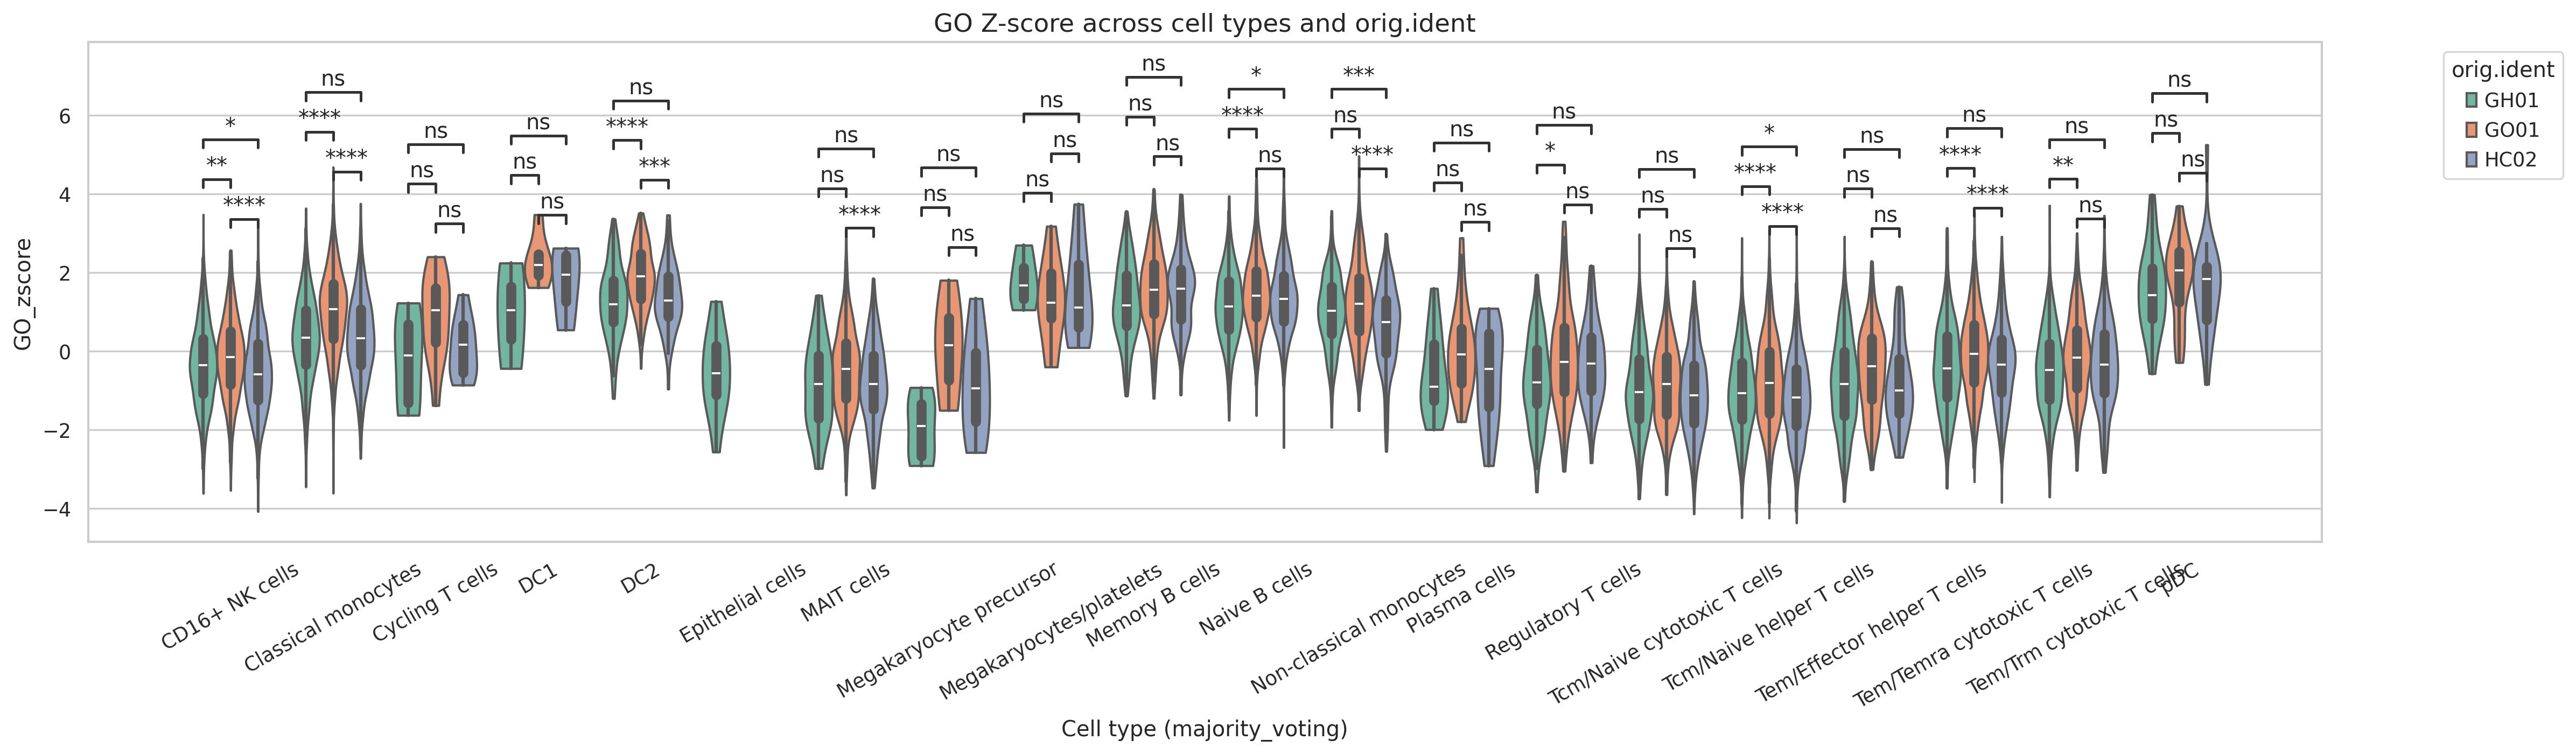

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
# 过滤出感兴趣的 orig.ident
adata_filtered = adata

# 创建一个新的 DataFrame，以便使用 seaborn
df = adata_filtered.to_df().copy()
df['orig.ident'] = adata_filtered.obs['orig.ident']
df['majority_voting'] = adata_filtered.obs['majority_voting']
df['ted_zscore']= adata_filtered.obs['ted_zscore']
# 设置绘图风格
# 设置 seaborn 风格
sns.set(style="whitegrid")

# 创建画布
plt.figure(figsize=(20, 6))
ax = sns.violinplot(data=df, x='majority_voting', y='ted_zscore',
                    hue='orig.ident', inner="box", palette="Set2",
                    cut=0, scale='width', dodge=True)

# 构建配对比较列表（每个细胞类型内部不同 orig.ident 两两比较）
pairs = []
for ct in df['majority_voting'].unique():
    groups = df[df['majority_voting'] == ct]['orig.ident'].unique()
    if len(groups) >= 2:
        for i in range(len(groups)):
            for j in range(i + 1, len(groups)):
                pairs.append(((ct, groups[i]), (ct, groups[j])))

# 添加显著性标注（仅显示显著的，使用 t-test）
annotator = Annotator(ax, pairs, data=df, x='majority_voting', y='ted_zscore', hue='orig.ident')
annotator.configure(test='t-test_ind', text_format='star', loc='inside', comparisons_correction="bonferroni")  # 🚨 不显示不显著的组
annotator.apply_and_annotate()

# 格式调整
plt.title("GO Z-score across cell types and orig.ident", fontsize=14)
plt.ylabel("GO_zscore")
plt.xlabel("Cell type (majority_voting)")
plt.xticks(rotation=30)
plt.legend(title='orig.ident', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 🚀 保存为 PDF 文件
plt.savefig("GO_violinplot.pdf", format='pdf')
plt.show()

KeyError: 'PTPN22'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
# 过滤出感兴趣的 orig.ident
adata_filtered = adata

# 创建一个新的 DataFrame，以便使用 seaborn
df = adata_filtered.to_df().copy()
df['orig.ident'] = adata_filtered.obs['orig.ident']
df['majority_voting'] = adata_filtered.obs['majority_voting']
df['TSHR'] = adata.raw[:,'TSHR'].X.flatten()  # 使用目标基因的表达量
# 设置绘图风格
# 设置 seaborn 风格
sns.set(style="whitegrid")

# 创建画布
plt.figure(figsize=(20, 6))
ax = sns.violinplot(data=df, x='majority_voting', y='TSHR',
                    hue='orig.ident', inner="box", palette="Set2",
                    cut=0, scale='width', dodge=True)

# 构建配对比较列表（每个细胞类型内部不同 orig.ident 两两比较）
pairs = []
for ct in df['majority_voting'].unique():
    groups = df[df['majority_voting'] == ct]['orig.ident'].unique()
    if len(groups) >= 2:
        for i in range(len(groups)):
            for j in range(i + 1, len(groups)):
                pairs.append(((ct, groups[i]), (ct, groups[j])))

# 添加显著性标注（仅显示显著的，使用 t-test）
annotator = Annotator(ax, pairs, data=df, x='majority_voting', y='TSHR', hue='orig.ident')
annotator.configure(test='t-test_ind', text_format='star', loc='inside', comparisons_correction="bonferroni")  # 🚨 不显示不显著的组
annotator.apply_and_annotate()

# 格式调整
plt.title("GO Z-score across cell types and orig.ident", fontsize=14)
plt.ylabel("GO_zscore")
plt.xlabel("Cell type (majority_voting)")
plt.xticks(rotation=30)
plt.legend(title='orig.ident', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 🚀 保存为 PDF 文件
plt.savefig("TSHR_violinplot.pdf", format='pdf')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
# 过滤出感兴趣的 orig.ident
adata_filtered = adata

# 创建一个新的 DataFrame，以便使用 seaborn
df = adata_filtered.to_df().copy()
df['orig.ident'] = adata_filtered.obs['orig.ident']
df['majority_voting'] = adata_filtered.obs['majority_voting']
df['PTPN22'] = adata.raw[:,'PTPN22'].X.flatten()  # 使用目标基因的表达量
# 设置绘图风格
# 设置 seaborn 风格
sns.set(style="whitegrid")

# 创建画布
plt.figure(figsize=(20, 6))
ax = sns.violinplot(data=df, x='majority_voting', y='PTPN22',
                    hue='orig.ident', inner="box", palette="Set2",
                    cut=0, scale='width', dodge=True)

# 构建配对比较列表（每个细胞类型内部不同 orig.ident 两两比较）
pairs = []
for ct in df['majority_voting'].unique():
    groups = df[df['majority_voting'] == ct]['orig.ident'].unique()
    if len(groups) >= 2:
        for i in range(len(groups)):
            for j in range(i + 1, len(groups)):
                pairs.append(((ct, groups[i]), (ct, groups[j])))

# 添加显著性标注（仅显示显著的，使用 t-test）
annotator = Annotator(ax, pairs, data=df, x='majority_voting', y='PTPN22', hue='orig.ident')
annotator.configure(test='t-test_ind', text_format='star', loc='inside', comparisons_correction="bonferroni")  # 🚨 不显示不显著的组
annotator.apply_and_annotate()

# 格式调整
plt.title("GO Z-score across cell types and orig.ident", fontsize=14)
plt.ylabel("GO_zscore")
plt.xlabel("Cell type (majority_voting)")
plt.xticks(rotation=30)
plt.legend(title='orig.ident', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 🚀 保存为 PDF 文件
plt.savefig("PTPN22_violinplot.pdf", format='pdf')
plt.show()

In [123]:
adata_filtered.obs['TSHR']

KeyError: 'TSHR'